In [1]:
import sys
import numpy as np
import pandas as pd
from rdkit import rdBase, Chem
from rdkit.Chem import AllChem, PandasTools, QED, Descriptors, rdMolDescriptors
%matplotlib inline
print(rdBase.rdkitVersion)

2020.09.1


455


,IDNUMBER,NAME,ADD_INFO,H_ACCEPTORS,H_DONORS,ROTATABLE_BONDS,LOGP,LOGS,TPSA,PRICE,ID,ROMol,SALTDATA,STEREOCHEM
0,AA-504/07224027,"17-(1,5-dimethylhexyl)-10,13-dimethyl-2,3,4,7,...",http://www.specs.net/enter.php?specsid=AA-504/...,1,1,5,8.7399998,-8.9700003,20.23,N05,AA-504/07224027,,NaN,NaN
1,AA-504/07226009,Beta-Sitosterol,http://www.specs.net/enter.php?specsid=AA-504/...,1,1,6,9.6499996,-9.9499998,20.23,N07,AA-504/07226009,,NaN,NaN
2,AA-504/07617049,"4,7-bis(dimethylamino)-3,10,12,12a-tetrahydrox...",http://www.specs.net/enter.php?specsid=AA-504/...,9,5,3,-0.079999998,-3.78,164.63,N05,AA-504/07617049,,NaN,NaN
3,AA-504/20833001,Angelicin (Isopsoralen),http://www.specs.net/enter.php?specsid=AA-504/...,1,0,0,2.0799999,-2.3399999,39.439999,N07,AA-504/20833001,,NaN,NaN
4,AA-504/20833002,Psoralen (Ficusin),http://www.specs.net/enter.php?specsid=AA-504/...,1,0,0,1.67,-1.99,39.439999,N07,AA-504/20833002,,NaN,NaN

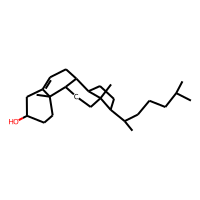
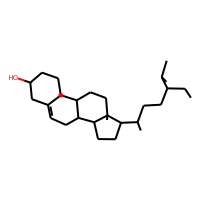
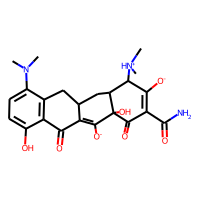
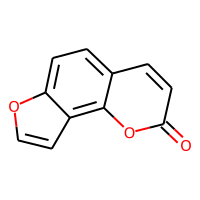
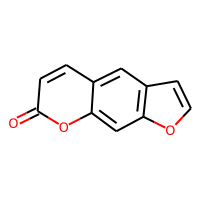

In [2]:
df = PandasTools.LoadSDF('./data/cmpounds.sdf')
print(len(df))
df.head()

,IDNUMBER,ROMol
0,AA-504/07224027,
1,AA-504/07226009,
2,AA-504/07617049,
3,AA-504/20833001,
4,AA-504/20833002,

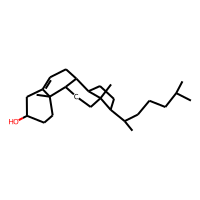
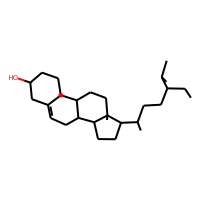
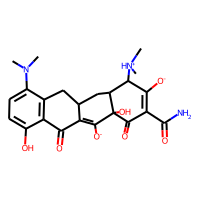
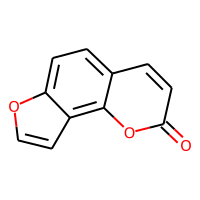
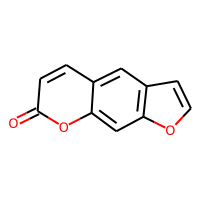

In [3]:
data = df[['IDNUMBER', 'ROMol']]
data.head()

In [4]:
#Lipinski: Rule of five
def rule_of_five(m):
    mw = Descriptors.MolWt(m)
    logp = Descriptors.MolLogP(m)
    hbd = rdMolDescriptors.CalcNumLipinskiHBD(m)
    hba = rdMolDescriptors.CalcNumLipinskiHBA(m)
    psa = Descriptors.TPSA(m)
    if (mw <= 500 and logp <= 5 and hbd <= 5 and hba <= 10):
        return 1
    else:
        return 0

In [5]:
#Rule of Four
def rule_of_four(m):
    mw = Descriptors.MolWt(m)
    logp = Descriptors.MolLogP(m)
    hba = rdMolDescriptors.CalcNumLipinskiHBA(m)
    rings = AllChem.CalcNumRings(m)
    if (mw >= 400 and logp >= 4 and rings >= 4 and hba >= 4):
        return 1
    else:
        return 0

In [6]:
#Rule of three
def rule_of_three(m):
    mw = Descriptors.MolWt(m)
    logp = Descriptors.MolLogP(m)
    hbd = rdMolDescriptors.CalcNumLipinskiHBD(m)
    hba = rdMolDescriptors.CalcNumLipinskiHBA(m)
    rotatable_bonds = Descriptors.NumRotatableBonds(m)
    if (mw <= 300 and logp <= 3 and hbd <= 3 and hba <= 3 and rotatable_bonds <= 3):
        return 1
    else:
        return 0

In [7]:
#Ghose Filter
def ghose_filter(m):
    mw = Descriptors.MolWt(m)
    logp = Descriptors.MolLogP(m)
    NumAtoms= Chem.rdchem.Mol.GetNumAtoms(m)
    mol_refractivity = Chem.Crippen.MolMR(m)
    if (mw >= 160 and mw <= 480 and logp >= 0.4 and logp <= 5.6 and NumAtoms >= 20 and NumAtoms <= 70 and mol_refractivity >= 40 and mol_refractivity <= 130):
        return 1
    else:
        return 0

In [8]:
# Veber Filter
def veber_filter(m):
    rotatable_bonds = Descriptors.NumRotatableBonds(m)
    psa = Descriptors.TPSA(m)
    if (rotatable_bonds <= 10 and psa <= 140):
        return 1
    else:
        return 0

In [9]:
# REOS Filter
def reos_filter(m):
    mw = Descriptors.MolWt(m)
    logp = Descriptors.MolLogP(m)
    hba = rdMolDescriptors.CalcNumLipinskiHBA(m)
    hbd = rdMolDescriptors.CalcNumLipinskiHBD(m)
    rotatable_bonds = Descriptors.NumRotatableBonds(m)
    formal_charge = Chem.rdmolops.GetFormalCharge(m)
    NumHeavyAtom = Chem.rdchem.Mol.GetNumHeavyAtoms(m)
    rings = AllChem.CalcNumRings(m)
    if (mw >= 200 and mw <= 500 and logp >= int(0 - 5) and logp <= 5 and hbd >= 0 and hbd <= 5 and hba >= 0 and hba <= 10 and 
        formal_charge >= int(0-2) and formal_charge <= 2 and rotatable_bonds >= 0 and rotatable_bonds <= 8 and NumHeavyAtom >= 15 and NumHeavyAtom <= 50):
        return 1
    else:
        return 0         

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

,IDNUMBER,ROMol,Ro3,Ro4,Lipinski,Ghose Filter,Veber Filter,REOS Filter,QED
0,AA-504/07224027,,0,0,0,0,1,0,0.488312
1,AA-504/07226009,,0,0,0,0,1,0,0.436096
2,AA-504/07617049,,0,0,1,0,0,1,0.337567
3,AA-504/20833001,,1,0,1,0,1,0,0.506483
4,AA-504/20833002,,1,0,1,0,1,0,0.506483

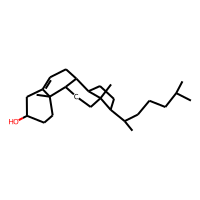
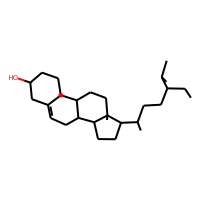
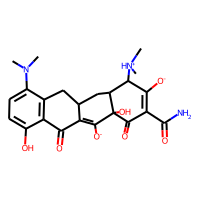
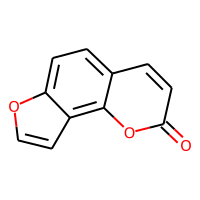
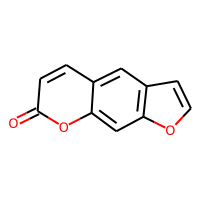

In [10]:
data['Ro3'] = data.ROMol.map(rule_of_three)
data['Ro4'] = data.ROMol.map(rule_of_four)
data['Lipinski'] = data.ROMol.map(rule_of_five)
data['Ghose Filter'] = data.ROMol.map(ghose_filter)
data["Veber Filter"] = data.ROMol.map(veber_filter)
data["REOS Filter"] = data.ROMol.map(reos_filter)
data['QED'] = data.ROMol.map(QED.qed)

data.head()

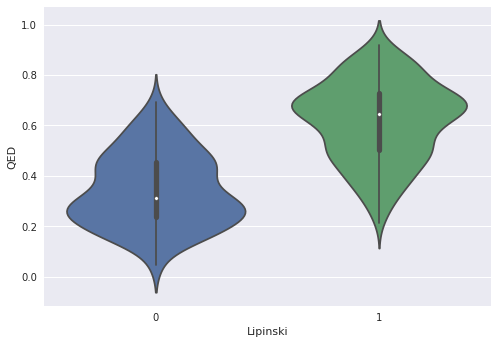

In [11]:
import matplotlib as mpl
import seaborn as sns
with mpl.style.context('seaborn'):
    sns.violinplot(x='Lipinski', y='QED', data=data)

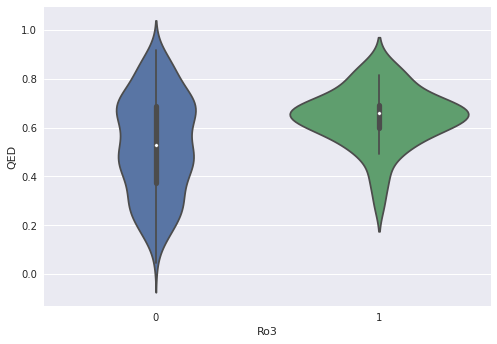

In [12]:
import matplotlib as mpl
import seaborn as sns
with mpl.style.context('seaborn'):
    sns.violinplot(x='Ro3', y='QED', data=data)

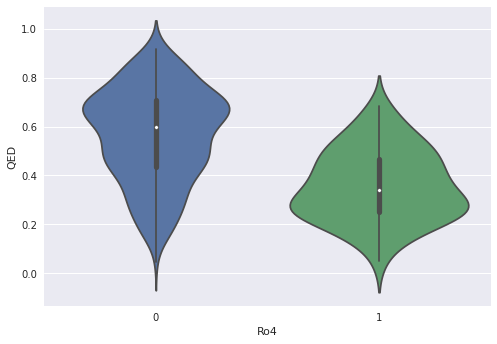

In [13]:
import matplotlib as mpl
import seaborn as sns
with mpl.style.context('seaborn'):
    sns.violinplot(x='Ro4', y='QED', data=data)